In [ ]:
import matplotlib.pyplot as plt
from collections import deque

def bfs(maze, start, goal):
    queue = deque([(start, [])]) 
    visited = set()

    while queue:
        current, path = queue.popleft()
        if current == goal:
            return path + [current]  
        if current in visited:
            continue 
        visited.add(current)

        x, y = current
        for dx, dy in [(0,1), (1,0), (0,-1), (-1,0)]: 
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] == 0:
                queue.append(((nx, ny), path + [current]))
    return None


def visualize_maze(maze, start, goal, path=None):
    plt.imshow(maze, cmap='Greys')  
    plt.scatter(start[1], start[0], color='yellow', label='Start')  
    plt.scatter(goal[1], goal[0], color='purple', label='Goal')    
    if path:
        for x, y in path[1:-1]:
            plt.scatter(y, x, color='green')  
    plt.legend()
    plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph from maze
def maze_to_graph(maze):
    rows, cols = len(maze), len(maze[0])
    G = nx.grid_2d_graph(rows, cols)  # Create grid graph
    # Remove walls (nodes where maze[x][y] == 1)
    for x in range(rows):
        for y in range(cols):
            if maze[x][y] == 1:
                G.remove_node((x, y))
    return G

# Visualize maze and path
def visualize_maze_graph(G, maze, path, start, goal):
    pos = {(x, y): (y, -x) for x, y in G.nodes()}  # Flip Y-axis for display
    nx.draw(G, pos, node_color='lightgrey', with_labels=False, node_size=300)
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='green', label='Path')
    nx.draw_networkx_nodes(G, pos, nodelist=[start], node_color='yellow', label='Start')
    nx.draw_networkx_nodes(G, pos, nodelist=[goal], node_color='purple', label='Goal')
    plt.legend()
    plt.show(

In [3]:
maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)

# Convert maze to graph
G = maze_to_graph(maze)

# Find shortest path using BFS
try:
    path = nx.shortest_path(G, source=start, target=goal)
    print("Path found:", path)
    visualize_maze_graph(G, maze, path, start, goal)
except nx.NetworkXNoPath:
    print("No path found from start to goal.")

NameError: name 'maze_to_graph' is not defined

Path found: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)]


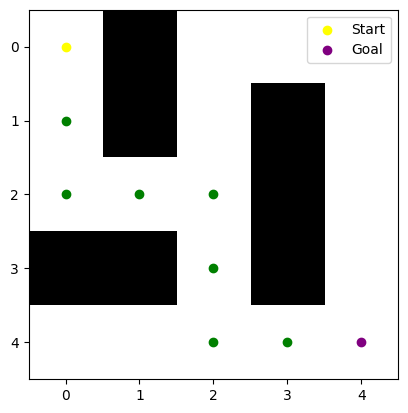

In [ ]:
maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)

path = bfs(maze, start, goal)
print("Path found:", path)
visualize_maze(maze, start, goal, path)